<a href="https://colab.research.google.com/github/ivynasantino/mineracao-de-dados/blob/master/02-processamento_de_texto/reports/stemmig_tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stemming e Tokenização

Nessa atividade iremos exercitar alguns conceitos sobre processamento de texto usando a coleção coletada nas atividades anteriores.



### Importando dados

Antes de tudo, é necessário importar os pacotes para tratamento de dados, processamento de texto e para gerar as visualizações ao final do notebook.

In [118]:
import pandas as pd
import numpy as np

import re
import collections

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import RSLPStemmer

nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
'''
Importando csv dos dados capturados do site El pais
'''

elpais = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/mineracao-de-dados/master/02-processamento_de_texto/data/results.csv")

Para iniciar, a estratégia de tokerização de utilizei foi retirar as stopwords e tokens com tamanho maior que 3. Após esse passo, calculei os valores de frequência, ranking, Pr(%) e r.Pr para reproduzir a tabela 4.2 do livro texto.

In [0]:
toker = RegexpTokenizer(r'\w+')
stopwords = stopwords.words("portuguese") 

'''
Aproveitando a função do notebook anterior
'''
def tokens(type_token):
  result = []
    
  for n in elpais.text:
    tokens = [token for token in toker.tokenize(n.lower()) 
              if token not in stopwords 
              and len(token) > 3
              and not bool(re.search(r'\d', token))]
  if type_token == 'bigram':
    result.extend(list(nltk.bigrams(tokens)))
  elif type_token == 'statistics collection':
    result.extend(tokens)
  return result

In [121]:
wl = tokens('statistics collection')

total_word_occur = len(wl)  

words = pd.DataFrame(wl, columns = ['word'])

word_count = words.word.value_counts().reset_index()

word_count.columns = ['word', 'freq']
word_count['r'] = word_count.freq.rank(ascending = False, 
                                       method = 'first')

occur_th = len(word_count[word_count.freq > 1000])

occur_once = len(word_count[word_count.freq == 1])

word_count['Pr(%)'] = round((word_count.freq / total_word_occur) * 100, 3)
word_count['r.Pr'] = round(word_count.r * word_count['Pr(%)'] / 100, 2)

word_count[:50]


,word,freq,r,Pr(%),r.Pr
0,marido,31,1.0,1.807,0.02
1,califado,25,2.0,1.457,0.03
2,campo,19,3.0,1.107,0.03
3,filhos,19,4.0,1.107,0.04
4,anos,17,5.0,0.991,0.05
5,síria,16,6.0,0.932,0.06
6,baguz,14,7.0,0.816,0.06
7,mulheres,13,8.0,0.758,0.06
8,jihadistas,13,9.0,0.758,0.07
9,espanha,12,10.0,0.699,0.07


A estratégia agora é aplicar Stemming nos tokens produzidos e encontrar 10 exemplos de falsos positivos e 10 exemplos de falsos negativos.

O código abaixo foi feito para facilitar a amostra todos os stemmings de forma que cada radical ficasse explícito e em conjunto viesse todas as palavras derivadas dela.

In [0]:
stemmer = nltk.stem.RSLPStemmer()

word_list = sorted(wl)
tokens_stem = {}   
for token in list(word_list):
  if stemmer.stem(token) in tokens_stem.keys():
    if token not in tokens_stem[stemmer.stem(token)]:
      tokens_stem[stemmer.stem(token)].append(token)
  else:
    tokens_stem[stemmer.stem(token)] = [token]
    
#tokens_stem


*Obs.: Se descomentar tokens_stem surgirá o dicionário completo, cuja chave é o radical e o valor é uma lista de elemento(s) derivados da chave.*

A seguir selecionei alguns falsos positivos/negativos da lista de stemmings contidos na variável tokens_stem.

#### Falsos negativos:
1. cas: ['casa', 'casado', 'casamento', 'casar', 'casaram', 'casou'] e casal: ['casal']

2. espanh: ['espanha'] e espanhol: ['espanhol', 'espanhola', 'espanholas', 'espanhóis']

3. famili: ['familiares'] e famíl: ['família', 'famílias']

4. franc: ['francesa'] e franç: ['frança']

5. iraqu: ['iraque'] e iraqui: ['iraquianas']

6. islam: ['islamismo'], islâm: ['islâmico'] e islã: ['islã']

7. simpl: ['simples'] e simples: ['simplesmente']

8. sír: ['síria', 'sírias'] e síri: ['sírio']

9. nacion: ['nacionais', 'nacional', 'nacionalizado'] e nacional: ['nacionalidade', 'nacionalidades']

10. obrig: ['obrigadas', 'obrigações'] e obrigatóri: ['obrigatório']

#### Falsos positivos:
1. est: ['estado', 'estada', 'estável']

2. cont: ['conta', 'conter', 'contas', 'contente']

3. pass: ['passado', 'passagens', 'passava', 'passo', 'passou', 'passar']

4. cont: ['conta', 'contas', 'contente', 'conter']

5. mes: ['meses', 'mesa']

6. proced: ['procedimento', 'procedentes']

7. convers: ['conversam', 'conversão']

8. pres: ['preso', 'presente']

9. post: ['postadas', 'posta']

10. cidad: ['cidadãos', 'cidade']

Como podemos observar que algumas das palavras acima não deveriam está contidas no grupo de determinado radical, pois não oferece o mesmo sentido das demais, 
- **Exemplo**: RADICAL [mes] - DERIVADOS [meses, mesa]

As duas palavras não tem sentido estarem juntas, porque não se encaixam no mesmo grupo de significado. Outro ponto que ocorre também é grupos de palavras pertecerem ao mesmo radical, mas não estão contidos no mesmo grupo.

- **Exemplo:** 
  1. RADICAL [simpl] - DERIVADO [simples] 
  2. RADICAL [simp] - DERIVADO[simplesmente]]
  
Como podemos ver acima, as palavras derivadas pertencem ao mesmo radical só que estão separadas por radicais diferentes, sendo que poderíam terem sidas representadas apenas por *simpl*.

Diante disso, falsos positivos/negativos não são bons no nosso conjunto de dados pelo fato de que, por muitas vezes, podem causar impactos não desejados em nossa busca.

In [0]:
tokens = [(stemmer.stem(token)) for token in list(wl)]

In [0]:
total_stem_occur = len(tokens)
 
words = pd.DataFrame(tokens, columns = ['word'])

stem_count = words.word.value_counts().reset_index()

stem_count.columns = ['word', 'freq']
stem_count['r'] = stem_count.freq.rank(ascending = False, 
                                       method = 'first')

stem_count['Pr(%)'] = round((stem_count.freq / total_stem_occur) * 100, 3)
stem_count['r.Pr'] = round(stem_count.r * stem_count['Pr(%)'] / 100, 2)


In [125]:
pr_stem = stem_count.freq / total_stem_occur * 100
rpr_stem = stem_count.r * (stem_count['Pr(%)']) / 100

c = round(np.mean(rpr_stem), 2)
c

0.27

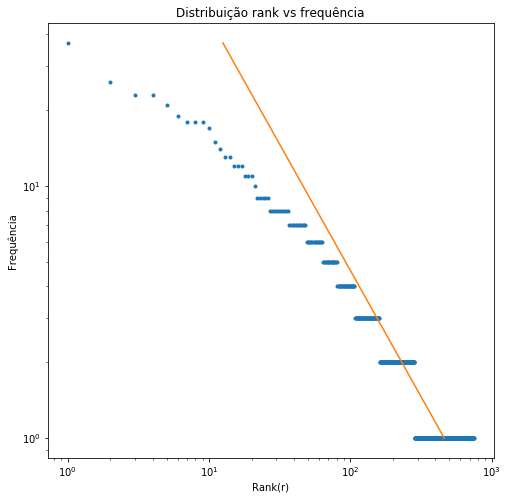

In [129]:
%matplotlib inline
stem_count['pred'] = np.mean(rpr_stem) / pr_stem * 100

f, ax = plt.subplots(figsize = (8, 8))
ax.set(xscale = 'log', 
       yscale = 'log')

plt.plot(stem_count['r'], stem_count['freq'], linestyle="", marker='.')
plt.plot(stem_count['pred'], stem_count['freq'])
plt.title("Distribuição rank vs frequência")
plt.xlabel("Rank(r)")
plt.ylabel("Frequência")
plt.show()

Como podemos observar no gráfico acima, o stemmings não possuem um bom ajuste, já que, como concluído anteriormente, há muitas palavras que não pertencem ao mesmo grupo do radical, consequentemente, irá atrapalhar a precisão.